###  Regresión y regresión

# Plan
* Pasar y extensión py
* Abrir en spider
* Acumular resultados
* Cargar en power bi
* Dormir

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
conGraficos=True

# Funciones

In [4]:
def hm_corr_graf(corr_matrix_V2, cat):
    aux=pd.pivot_table(corr_matrix_V2,columns=['variable_2'],index=['variable_1'],values=['r'])
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
    sns.heatmap(
        aux,
        annot     = True,
        cbar      = False,
        annot_kws = {"size": 10},
        vmin      = -0.5,
        vmax      = 0.5,
        center    = 0,
        cmap      = sns.diverging_palette(20, 220, n=200),
        square    = True,
        ax        = ax
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation = 45,
        horizontalalignment = 'right',
    )
    ax.tick_params(labelsize = 10)
    ax.set_title(cat)

In [5]:
# para ver el grado de correlación entre las variables disponibles.
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

In [6]:
def dic_corr_ind(data):
    corr_matrix = data.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
    corr_tab=tidy_corr_matrix(corr_matrix)
    corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
    corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]
    
    #res_corr_total_var_nacional=corr_tab_bajas[corr_tab_bajas['variable_1'].isin(sel_variables_razones)]
    res_corr_total_raz_nacional=corr_tab_bajas[corr_tab_bajas['variable_1'].isin(sel_variables_causas2)]
    #res_corr_total_var_nacional.drop(columns=['abs_r'],inplace=True)
    res_corr_total_raz_nacional.drop(columns=['abs_r'],inplace=True)
    
    #corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
    
    res_corr_total_raz_nacional=res_corr_total_raz_nacional.sort_values('variable_1')
    
    #return res_corr_total_raz_nacional, res_corr_total_var_nacional, corr_tab_razones
    return res_corr_total_raz_nacional

In [7]:
def dic_corr_mes_ind(data):
    #res_corr_total_var=res_corr_total_var_nacional
    res_corr_total_raz=res_corr_total_raz_nacional
    dic_resultados={}
    
    for i in range(1,12):
        print(i)
        dic_aux={}
        data_aux=data[data['FECHA']==i]    
        corr_matrix = data_aux.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
        corr_tab=tidy_corr_matrix(corr_matrix)
        corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
        #corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]    
        dic_aux['total']=corr_tab_bajas    
        #corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
        #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
        #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
        #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_2'].isin(sel_variables_razones)]
        #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]    
        #dic_aux['razones']=corr_tab_razones
        dic_resultados[i]=dic_aux

    for i in range(1,12):
        print(i)
        #aux_tab_var=dic_resultados[i]['total'][dic_resultados[i]['total']['variable_1'].isin(sel_variables_razones)]
        aux_tab_sel=dic_resultados[i]['total'][dic_resultados[i]['total']['variable_1'].isin(sel_variables_causas2)]
        #aux_tab_var.drop(columns=['abs_r'],inplace=True)
        aux_tab_sel.drop(columns=['abs_r'],inplace=True)
        #aux_tab_var.columns=['variable_1',str(i)+'_r']
        ###aux_tab_sel.columns=['variable_1',str(i)+'_r']    
        aux_tab_sel.columns=['variable_1',i]
        #res_corr_total_var=res_corr_total_var.merge(aux_tab_var,left_on='variable_1',right_on='variable_1', how='left')
        res_corr_total_raz=res_corr_total_raz.merge(aux_tab_sel,left_on='variable_1',right_on='variable_1', how='left')
    
    res_corr_total_raz_T=res_corr_total_raz.T
    res_corr_total_raz_T.columns = res_corr_total_raz_T.iloc[0]
    res_corr_total_raz_T = res_corr_total_raz_T.iloc[2:]   
    
    #res_corr_total_var_T=res_corr_total_var.T
    #res_corr_total_var_T.columns = res_corr_total_var_T.iloc[0]
    #res_corr_total_var_T = res_corr_total_var_T.iloc[1:]
    
    #return res_corr_total_raz_T, res_corr_total_var_T
    return res_corr_total_raz_T

In [8]:
def iter_regresion_VIF(data_reg):    
    i=0
    flag=1
    variables_eliminar=['ind_churn','FECHA']
    y_train = data_reg['ind_churn']    
   
    while flag>0:
        i=i+1
        print(i)
        data_reg=data_reg.drop(columns=variables_eliminar)
        # Dividir en X y X       
        X_train =  data_reg
        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()
        #lr_1.summary()
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        #vif
        df_coef=lr_1.params.to_frame()
        df_coef.columns=['coefs']
        df_p_values=lr_1.pvalues.to_frame()
        df_p_values.columns=['pvalues'] 
        
        df_revision=df_coef.merge(df_p_values, left_index=True, right_index=True)
        df_revision=df_revision.merge(vif, left_index=True, right_on=['Features'])
        print(df_revision)
        fila_problema=df_revision.sort_values(['pvalues'],ascending=False).head(1)
        print(fila_problema)
        if fila_problema['pvalues'].values[0]>0.05 :
            variables_eliminar=fila_problema['Features']
        else:
            fila_problema=df_revision.sort_values(['VIF'],ascending=False).head(1)
            if fila_problema['VIF'].values[0]>20 :
                variables_eliminar=fila_problema['Features']
            else:
                flag=0 
                
    return df_revision

In [9]:
def iter_regresion(data_reg):    
    i=0
    flag=1
    variables_eliminar=['ind_churn','FECHA']
    y_train = data_reg['ind_churn']    
   
    while flag>0:
        i=i+1
        print(i)
        data_reg=data_reg.drop(columns=variables_eliminar)
        # Dividir en X y X       
        X_train =  data_reg
        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()
        #lr_1.summary()
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        #vif
        df_coef=lr_1.params.to_frame()
        df_coef.columns=['coefs']
        df_p_values=lr_1.pvalues.to_frame()
        df_p_values.columns=['pvalues'] 
        
        df_revision=df_coef.merge(df_p_values, left_index=True, right_index=True)
        df_revision=df_revision.merge(vif, left_index=True, right_on=['Features'])
        print(df_revision)
        fila_problema=df_revision.sort_values(['pvalues'],ascending=False).head(1)
        print(fila_problema)
        if fila_problema['pvalues'].values[0]>0.05 :
            variables_eliminar=fila_problema['Features']
        else:
            flag=0
            #fila_problema=df_revision.sort_values(['VIF'],ascending=False).head(1)
            #if fila_problema['VIF'].values[0]>20 :
            #    variables_eliminar=fila_problema['Features']
            #else:                 
                
    return df_revision

In [10]:
def dic_reg_mes_ind(data_reg):
    df_coef=df_coef_nal
    df_vif=df_vif_nal
    dic_resultados={}
    
    for i in range(1,12):
        dic_aux={}
        data_aux=data_reg[data_reg['FECHA']==i] 
        data_aux.drop(columns=['FECHA'],inplace=True)
        #data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
        
        y_train = data_aux.pop('ind_churn')
        X_train = data_aux[colums_reg]    
        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()    
        dic_aux['coef']=lr_1.params.to_frame()
        dic_aux['coef'].columns=['coefs']
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        dic_aux['vif']=vif
        dic_resultados[i]=dic_aux
    
    for i in range(1,12):
        print(i)

        aux_tab_coef=dic_resultados[i]['coef']
        aux_tab_vif=dic_resultados[i]['vif']

        #aux_tab_coef.columns=[str(i)+'_coef']
        aux_tab_coef.columns=[i]
        #aux_tab_vif.columns=['Features',str(i)+'_vif']
        aux_tab_vif.columns=['Features',i]

        df_coef=df_coef.merge(aux_tab_coef,left_index=True,right_index=True, how='left')
        df_vif=df_vif.merge(aux_tab_vif,left_on='Features',right_on='Features', how='left')

    return df_coef, df_vif

# Carga Preprocesamiento

In [11]:
data_c0= pd.read_csv('../NODOS_FILTRADOS_baseTodo.csv',sep=';', header = 0)

In [12]:
data_c0.describe()

,MES,CANT_USER,BAJAS_1.TOTAL,BAJAS_2.CHURN_TEMPRANO,BAJAS_3.CHURN_7_24,BAJAS_4.VOL,BAJAS_5.INVOL,BAJAS_6.VOL_CHURN_TEMPRANO,BAJAS_7.INVOL_CHURN_TEMPRANO,BAJAS_8.VOL_CHURN_7_24,...,BAJAS_36.@_INVOL_CHURN_7_24,ALFA,ALFA_tarifa,BETA,Llamadas_3M,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
count,38225.000000,38225.000000,38225.000000,38225.000000,38225.000000,38225.000000,38225.000000,38225.000000,38225.000000,38225.000000,...,38225.000000,38161.000000,37804.000000,38206.000000,38225.000000,38225.000000,38225.000000,38179.000000,38212.000000,38225.000000
mean,6.000000,288.078901,0.080229,0.014750,0.026101,0.040596,0.039633,0.002432,0.012318,0.010535,...,0.005926,1.289963,0.963787,1.289975,0.253055,0.221078,0.027602,1.006921,0.499631,0.365970
std,3.162319,132.518093,0.044296,0.019149,0.024676,0.025301,0.037808,0.005505,0.017614,0.013080,...,0.007177,0.933955,0.189861,0.569264,0.163750,0.142463,0.033747,0.587491,0.145628,0.096088
min,1.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.415299,0.139640,0.000000,0.000000,0.000000,0.000000,0.000000,0.133588
25%,3.000000,193.000000,0.049180,0.000000,0.008287,0.023392,0.011905,0.000000,0.000000,0.000000,...,0.000000,0.598521,0.824831,0.911394,0.133065,0.116541,0.000000,0.559483,0.392541,0.296190
50%,6.000000,270.000000,0.072954,0.009063,0.020645,0.036923,0.030100,0.000000,0.005988,0.006961,...,0.003953,1.090514,0.948466,1.177389,0.224199,0.196517,0.017045,0.925755,0.497879,0.350120
75%,9.000000,361.000000,0.103704,0.022059,0.037671,0.053299,0.057252,0.000000,0.018657,0.016949,...,0.008929,1.759093,1.086801,1.526151,0.342697,0.299191,0.039735,1.375995,0.604935,0.418627
max,11.000000,1366.000000,0.431034,0.238095,0.270588,0.375940,0.413793,0.070588,0.238095,0.154472,...,0.082873,6.351504,1.511379,4.666667,0.976077,0.824903,0.216590,3.175737,0.879946,0.688474


In [13]:
data_c0.columns

Index(['MES', 'NODO', 'DIVISION', 'AREA', 'ZONA', 'CIUDAD', 'DISTRITO',
       'CANT_USER', 'BAJAS_1.TOTAL', 'BAJAS_2.CHURN_TEMPRANO',
       'BAJAS_3.CHURN_7_24', 'BAJAS_4.VOL', 'BAJAS_5.INVOL',
       'BAJAS_6.VOL_CHURN_TEMPRANO', 'BAJAS_7.INVOL_CHURN_TEMPRANO',
       'BAJAS_8.VOL_CHURN_7_24', 'BAJAS_9.INVOL_CHURN_7_24', 'BAJAS_10.V',
       'BAJAS_11.V_CHURN_TEMPRANO', 'BAJAS_12.V_CHURN_7_24', 'BAJAS_13.V_VOL',
       'BAJAS_14.V_INVOL', 'BAJAS_15.V_VOL_CHURN_TEMPRANO',
       'BAJAS_16.V_INVOL_CHURN_TEMPRANO', 'BAJAS_17.V_VOL_CHURN_7_24',
       'BAJAS_18.V_INVOL_CHURN_7_24', 'BAJAS_19.T',
       'BAJAS_20.T_CHURN_TEMPRANO', 'BAJAS_21.T_CHURN_7_24', 'BAJAS_22.T_VOL',
       'BAJAS_23.T_INVOL', 'BAJAS_24.T_VOL_CHURN_TEMPRANO',
       'BAJAS_25.T_INVOL_CHURN_TEMPRANO', 'BAJAS_26.T_VOL_CHURN_7_24',
       'BAJAS_27.T_INVOL_CHURN_7_24', 'BAJAS_28.@',
       'BAJAS_29.@_CHURN_TEMPRANO', 'BAJAS_30.@_CHURN_7_24', 'BAJAS_31.@_VOL',
       'BAJAS_32.@_INVOL', 'BAJAS_33.@_VOL_CHURN_TEMPRANO

In [14]:
sel_variables_descrip=['MES','NODO','DIVISION', 'AREA', 'ZONA', 'CIUDAD', 'DISTRITO','CANT_USER']
sel_variables_causas2=['ALFA_tarifa','ALFA', 'BETA', 'MEGA', 'Llamadas_Admin_3M', 'Llamadas_Tecn_3M','PENETRACION','OCUPACION_DW']
columns_bajas=list(data_c0.filter(regex=("BAJAS.*")).columns)

### Reemplazar nombre de columnas por compatibilidad

In [15]:
data_c0.rename(columns={'MES':'FECHA','NODO':'COD_NODO'}, inplace=True)

In [16]:
maestro_data=data_c0[['COD_NODO','DIVISION', 'AREA', 'ZONA', 'CIUDAD', 'DISTRITO']].drop_duplicates()

## CORRELACIONES

###  Correlacion Bajas Totales

##  Funcion validar configuraciones Nacional

In [17]:
#data_c0['BAJAS_1.TOTAL'].sum()
data_c0['BAJAS_31.@_VOL'].sum()

587.5311197723252

In [18]:
data_c0['ind_churn']=data_c0['BAJAS_31.@_VOL']

In [19]:
data_c0['COD_NODO'].value_counts().min()

11

In [20]:
#Eliminar validación ==1
data_c0['val_ind']=np.where(data_c0['ind_churn']==0,1,0)

In [21]:
data_c0.groupby('COD_NODO')[['val_ind']].max().describe()

,val_ind
count,3475.000000
mean,0.315396
std,0.464740
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [22]:
data_c0['COD_NODO'].nunique()

3475

In [23]:
res_nodo=data_c0.groupby('COD_NODO')[['val_ind']].max()

In [24]:
res_nodo['val_ind'].value_counts()

0    2379
1    1096
Name: val_ind, dtype: int64

In [25]:
## Seleccion Solo Churn
data_c0=data_c0[data_c0['COD_NODO'].isin(res_nodo[res_nodo['val_ind']==0].index)]

In [26]:
data_c0['COD_NODO'].nunique()

2379

# Val Configuraciones

In [27]:
DataSetEntregable_totales=pd.DataFrame()

In [28]:
DataSetEntregable_totales_temp=pd.DataFrame()

In [29]:
res_corr_total_raz_nacional=dic_corr_ind(data_c0)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [30]:
res_corr_total_raz_nacional.rename(columns={'r':'NACIONAL'},inplace=True)

In [31]:
RV_nal_c0=dic_corr_ind(data_c0)

In [32]:
RV_nal_c0.rename(columns={'r':'NACIONAL'},inplace=True)

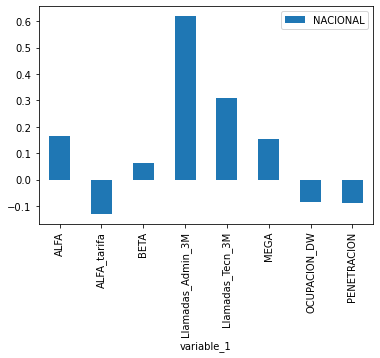

In [33]:
if conGraficos:
    RV_nal_c0.set_index('variable_1').plot.bar()

In [34]:
DataSetEntregable_totales=RV_nal_c0.copy()

In [35]:
DataSetEntregable_totales=DataSetEntregable_totales.set_index('variable_1').T

### Correlaciones x Periodo

### Funcion correlaciones por periodo
* Recibe los datos y retorna data framames para graficar

In [36]:
#(res_corr_total_raz_T, res_corr_total_var_T)=dic_corr_mes_ind(data_c0)
res_corr_total_raz_T=dic_corr_mes_ind(data_c0)

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [37]:
res_corr_total_raz_T

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
1,0.161977,-0.112205,0.042844,0.621644,0.312532,0.164299,-0.095207,-0.031373
2,0.164111,-0.15382,0.045487,0.650051,0.268217,0.167856,-0.084153,-0.029327
3,0.188436,-0.179801,0.074492,0.636106,0.275999,0.174837,-0.091421,-0.081084
4,0.140711,-0.118341,0.017906,0.688189,0.348769,0.154048,-0.059783,-0.103597
5,0.166923,-0.131686,0.054857,0.625676,0.353776,0.155777,-0.093725,-0.118039
6,0.192934,-0.143355,0.071027,0.649195,0.337136,0.178393,-0.092598,-0.117371
7,0.144696,-0.123732,0.012802,0.63497,0.298719,0.155536,-0.08257,-0.097732
8,0.189897,-0.148796,0.049811,0.683996,0.324743,0.192881,-0.080394,-0.079416
9,0.180266,-0.068931,0.031038,0.636962,0.292128,0.179207,-0.136703,-0.100019
10,0.128713,-0.044848,-0.023994,0.682622,0.344641,0.159187,-0.055839,-0.077007


In [38]:
DataSetEntregable_totales_temp=res_corr_total_raz_T.copy()

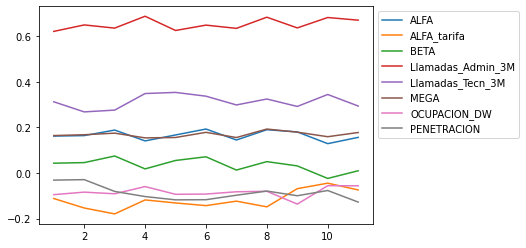

In [39]:
if conGraficos:
    ax = res_corr_total_raz_T.plot.line()
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(20,10));

### Analisis Específicos

In [40]:
#data=data_c0.merge(maestro_data, left_on=['COD_NODO'], right_on=['COD_NODO'], how='left')
data=data_c0.copy()

In [41]:
data.groupby('DIVISION')['CANT_USER'].sum().to_frame().sort_values('CANT_USER',ascending=False)

,CANT_USER
DIVISION,
REGION CENTRO,4419230
REGION OCCIDENTE,1791328
REGION NOROCCIDENTE,1393718
REGION ORIENTE,724050
REGION COSTA,287519


In [42]:
data.groupby('CIUDAD')['CANT_USER'].sum().to_frame().sort_values('CANT_USER',ascending=False).head(6)

,CANT_USER
CIUDAD,
BOGOTA,4312351
CALI,1051540
MEDELLIN,707618
PEREIRA,302564
IBAGUE,234808
BUCARAMANGA,228503


In [43]:
data[data['CIUDAD']=='BOGOTA'].groupby('AREA')['CANT_USER'].sum().to_frame().sort_values('CANT_USER',ascending=False).head(10)

,CANT_USER
AREA,
BOGOTA OCCIDENTE,1146968
BOGOTA SUR,1066577
BOGOTA NORTE,1065731
BOGOTA ORIENTE,1033075


### Analisis regionales

In [44]:
regionales=data['DIVISION'].unique()
regionales = [x for x in regionales if pd.notnull(x)]
regionales

['REGION COSTA',
 'REGION ORIENTE',
 'REGION CENTRO',
 'REGION NOROCCIDENTE',
 'REGION OCCIDENTE']

In [45]:
dic_resultados={}

In [46]:
for reg in regionales:
    print(reg)
    dic_aux={}
    data_aux=data[data['DIVISION']==reg]    
    corr_matrix = data_aux.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
    corr_tab=tidy_corr_matrix(corr_matrix)
    corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
    #corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]
    
    dic_aux['total']=corr_tab_bajas
    
    #corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]    
    #dic_aux['razones']=corr_tab_razones
    dic_resultados[reg]=dic_aux

REGION COSTA
REGION ORIENTE
REGION CENTRO
REGION NOROCCIDENTE
REGION OCCIDENTE


In [47]:
#res_corr_total_var=res_corr_total_var_nacional
res_corr_total_raz=res_corr_total_raz_nacional
for reg in regionales:
    print(reg)
    #aux_tab_var=dic_resultados[reg]['total'][dic_resultados[reg]['total']['variable_1'].isin(sel_variables_razones)]
    aux_tab_sel=dic_resultados[reg]['total'][dic_resultados[reg]['total']['variable_1'].isin(sel_variables_causas2)]
    #aux_tab_var.drop(columns=['abs_r'],inplace=True)
    aux_tab_sel.drop(columns=['abs_r'],inplace=True)
    #aux_tab_var.columns=['variable_1',reg]
    aux_tab_sel.columns=['variable_1',reg]
    
    #res_corr_total_var=res_corr_total_var.merge(aux_tab_var,left_on='variable_1',right_on='variable_1', how='left')
    res_corr_total_raz=res_corr_total_raz.merge(aux_tab_sel,left_on='variable_1',right_on='variable_1', how='left')

REGION COSTA
REGION ORIENTE
REGION CENTRO
REGION NOROCCIDENTE
REGION OCCIDENTE


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [48]:
res_corr_total_raz_nacional

,variable_1,NACIONAL
1871,ALFA,0.165656
1919,ALFA_tarifa,-0.130403
1967,BETA,0.062054
2063,Llamadas_Admin_3M,0.618363
2111,Llamadas_Tecn_3M,0.310620
2159,MEGA,0.153253
2207,OCUPACION_DW,-0.085932
2255,PENETRACION,-0.089017


In [49]:
res_corr_total_raz_T=res_corr_total_raz.T
res_corr_total_raz_T.columns = res_corr_total_raz_T.iloc[0]
res_corr_total_raz_T = res_corr_total_raz_T.iloc[1:]

In [50]:
DataSetEntregable_totales=DataSetEntregable_totales.append(res_corr_total_raz_T[1:])
DataSetEntregable_totales

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
NACIONAL,0.165656,-0.130403,0.062054,0.618363,0.31062,0.153253,-0.085932,-0.089017
REGION COSTA,0.155981,-0.163738,0.038423,0.549379,0.212346,0.141831,-0.105801,-0.029411
REGION ORIENTE,0.189095,-0.093692,0.051029,0.651363,0.328244,0.177949,-0.050379,-0.171881
REGION CENTRO,0.156207,-0.203288,0.070358,0.616581,0.335096,0.133275,-0.099908,-0.091316
REGION NOROCCIDENTE,0.07753,-0.074485,0.04012,0.608288,0.288396,0.064971,-0.045838,-0.005858
REGION OCCIDENTE,0.21283,-0.063784,0.070613,0.637422,0.291796,0.203125,-0.084546,-0.14181


In [51]:
DataSetEntregable_totales

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
NACIONAL,0.165656,-0.130403,0.062054,0.618363,0.31062,0.153253,-0.085932,-0.089017
REGION COSTA,0.155981,-0.163738,0.038423,0.549379,0.212346,0.141831,-0.105801,-0.029411
REGION ORIENTE,0.189095,-0.093692,0.051029,0.651363,0.328244,0.177949,-0.050379,-0.171881
REGION CENTRO,0.156207,-0.203288,0.070358,0.616581,0.335096,0.133275,-0.099908,-0.091316
REGION NOROCCIDENTE,0.07753,-0.074485,0.04012,0.608288,0.288396,0.064971,-0.045838,-0.005858
REGION OCCIDENTE,0.21283,-0.063784,0.070613,0.637422,0.291796,0.203125,-0.084546,-0.14181


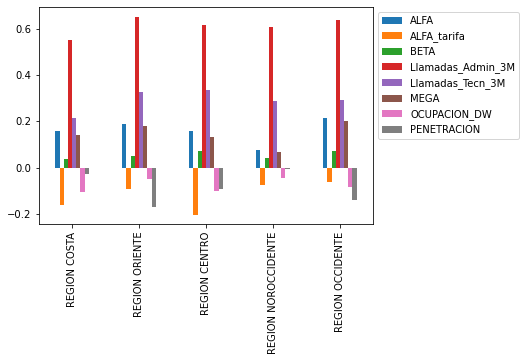

In [52]:
if conGraficos:
    ax = res_corr_total_raz_T[1:].plot.bar()
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(30,20));

### Analisis Temporal_ ESPECIFICO

In [53]:
## guardar en tabla
for reg in regionales:
    data_aux=data[data['DIVISION']==reg]    
    #(res_corr_total_raz_T, res_corr_total_var_T)=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp=DataSetEntregable_totales_temp.append(res_corr_total_raz_T)

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(



3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [54]:
DataSetEntregable_totales_temp['CATEGORIA']=DataSetEntregable_totales_temp['CATEGORIA'].fillna('NACIONAL')

In [55]:
DataSetEntregable_totales_temp

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION,CATEGORIA
1,0.161977,-0.112205,0.042844,0.621644,0.312532,0.164299,-0.095207,-0.031373,NACIONAL
2,0.164111,-0.15382,0.045487,0.650051,0.268217,0.167856,-0.084153,-0.029327,NACIONAL
3,0.188436,-0.179801,0.074492,0.636106,0.275999,0.174837,-0.091421,-0.081084,NACIONAL
4,0.140711,-0.118341,0.017906,0.688189,0.348769,0.154048,-0.059783,-0.103597,NACIONAL
5,0.166923,-0.131686,0.054857,0.625676,0.353776,0.155777,-0.093725,-0.118039,NACIONAL
...,...,...,...,...,...,...,...,...,...
7,0.155409,0.032005,0.022634,0.644855,0.257254,0.153085,-0.082181,-0.188663,REGION OCCIDENTE
8,0.267894,-0.125668,0.086724,0.66532,0.284088,0.291764,-0.087259,-0.093923,REGION OCCIDENTE
9,0.156335,-0.021794,0.016242,0.632178,0.308804,0.185123,-0.149391,-0.153033,REGION OCCIDENTE
10,0.152188,-0.044572,0.003979,0.666471,0.269902,0.151449,-0.078634,-0.168314,REGION OCCIDENTE


## Ciudades

In [56]:
ciudades=data.groupby('CIUDAD')['CANT_USER'].sum().to_frame().sort_values('CANT_USER',ascending=False).head(6).index
ciudades

Index(['BOGOTA', 'CALI', 'MEDELLIN', 'PEREIRA', 'IBAGUE', 'BUCARAMANGA'], dtype='object', name='CIUDAD')

In [57]:
dic_resultados_ciudad={}

In [58]:
for reg in ciudades:
    print(reg)
    dic_aux={}
    data_aux=data[data['CIUDAD']==reg]    
    corr_matrix = data_aux.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
    corr_tab=tidy_corr_matrix(corr_matrix)
    corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
    #corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]
    
    dic_aux['total']=corr_tab_bajas
    
    #corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]
    
    #dic_aux['razones']=corr_tab_razones
    dic_resultados_ciudad[reg]=dic_aux

BOGOTA
CALI
MEDELLIN
PEREIRA
IBAGUE
BUCARAMANGA


In [59]:
#res_corr_total_var=res_corr_total_var_nacional
res_corr_total_raz=res_corr_total_raz_nacional
for reg in ciudades:
    print(reg)
    #aux_tab_var=dic_resultados_ciudad[reg]['total'][dic_resultados_ciudad[reg]['total']['variable_1'].isin(sel_variables_razones)]
    aux_tab_sel=dic_resultados_ciudad[reg]['total'][dic_resultados_ciudad[reg]['total']['variable_1'].isin(sel_variables_causas2)]
    #aux_tab_var.drop(columns=['abs_r'],inplace=True)
    aux_tab_sel.drop(columns=['abs_r'],inplace=True)
    #aux_tab_var.columns=['variable_1',reg+'_r']
    aux_tab_sel.columns=['variable_1',reg]
    
    #res_corr_total_var=res_corr_total_var.merge(aux_tab_var,left_on='variable_1',right_on='variable_1', how='left')
    res_corr_total_raz=res_corr_total_raz.merge(aux_tab_sel,left_on='variable_1',right_on='variable_1', how='left')

BOGOTA
CALI
MEDELLIN
PEREIRA
IBAGUE
BUCARAMANGA


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [60]:
res_corr_total_raz_T=res_corr_total_raz.T
res_corr_total_raz_T.columns = res_corr_total_raz_T.iloc[0]
res_corr_total_raz_T = res_corr_total_raz_T.iloc[1:]

In [61]:
res_corr_total_raz_T

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
NACIONAL,0.165656,-0.130403,0.062054,0.618363,0.31062,0.153253,-0.085932,-0.089017
BOGOTA,0.155022,-0.204669,0.06919,0.614827,0.334086,0.132552,-0.097171,-0.088822
CALI,0.247322,-0.123283,0.050345,0.628977,0.265378,0.253106,-0.108044,-0.089332
MEDELLIN,0.101876,-0.085235,0.066919,0.622342,0.295297,0.073812,-0.076199,-0.06661
PEREIRA,0.044439,0.129521,-0.001303,0.61202,0.304067,0.049904,0.052871,0.064511
IBAGUE,0.043293,0.099942,-0.012399,0.633316,0.290753,0.053367,0.046596,-0.090454
BUCARAMANGA,0.060254,0.008835,0.064745,0.615051,0.293315,0.020778,-0.018745,-0.103069


In [62]:
DataSetEntregable_totales=DataSetEntregable_totales.append(res_corr_total_raz_T[1:])
DataSetEntregable_totales

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
NACIONAL,0.165656,-0.130403,0.062054,0.618363,0.31062,0.153253,-0.085932,-0.089017
REGION COSTA,0.155981,-0.163738,0.038423,0.549379,0.212346,0.141831,-0.105801,-0.029411
REGION ORIENTE,0.189095,-0.093692,0.051029,0.651363,0.328244,0.177949,-0.050379,-0.171881
REGION CENTRO,0.156207,-0.203288,0.070358,0.616581,0.335096,0.133275,-0.099908,-0.091316
REGION NOROCCIDENTE,0.07753,-0.074485,0.04012,0.608288,0.288396,0.064971,-0.045838,-0.005858
REGION OCCIDENTE,0.21283,-0.063784,0.070613,0.637422,0.291796,0.203125,-0.084546,-0.14181
BOGOTA,0.155022,-0.204669,0.06919,0.614827,0.334086,0.132552,-0.097171,-0.088822
CALI,0.247322,-0.123283,0.050345,0.628977,0.265378,0.253106,-0.108044,-0.089332
MEDELLIN,0.101876,-0.085235,0.066919,0.622342,0.295297,0.073812,-0.076199,-0.06661
PEREIRA,0.044439,0.129521,-0.001303,0.61202,0.304067,0.049904,0.052871,0.064511


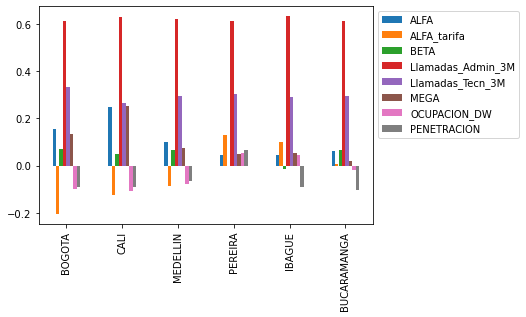

In [63]:
if conGraficos:
    ax = res_corr_total_raz_T[1:].plot.bar()
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot()

### Analisis temporal

In [64]:
## guardar en tabla
for reg in ciudades:
    data_aux=data[data['CIUDAD']==reg]      
    #(res_corr_total_raz_T, res_corr_total_var_T)=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp=DataSetEntregable_totales_temp.append(res_corr_total_raz_T)

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(



6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(



8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


In [65]:
DataSetEntregable_totales_temp

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION,CATEGORIA
1,0.161977,-0.112205,0.042844,0.621644,0.312532,0.164299,-0.095207,-0.031373,NACIONAL
2,0.164111,-0.15382,0.045487,0.650051,0.268217,0.167856,-0.084153,-0.029327,NACIONAL
3,0.188436,-0.179801,0.074492,0.636106,0.275999,0.174837,-0.091421,-0.081084,NACIONAL
4,0.140711,-0.118341,0.017906,0.688189,0.348769,0.154048,-0.059783,-0.103597,NACIONAL
5,0.166923,-0.131686,0.054857,0.625676,0.353776,0.155777,-0.093725,-0.118039,NACIONAL
...,...,...,...,...,...,...,...,...,...
7,0.090694,0.076748,0.066644,0.730408,0.379534,0.109129,0.032253,0.170913,BUCARAMANGA
8,0.143961,-0.102772,0.175154,0.731366,0.392331,0.009179,-0.00992,-0.1555,BUCARAMANGA
9,0.003594,-0.004767,0.121577,0.560696,0.182875,-0.159804,-0.167237,-0.146183,BUCARAMANGA
10,0.070021,-0.026703,0.17959,0.650067,0.344125,-0.073045,-0.114598,0.126977,BUCARAMANGA


### Bogotá

In [66]:
sectoresBog=data[data['CIUDAD']=='BOGOTA']['AREA'].unique()

In [67]:
dic_resultados_Bogota={}

In [68]:
for reg in sectoresBog:
    print(reg)
    dic_aux={}
    data_aux=data[data['AREA']==reg]    
    corr_matrix = data_aux.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
    corr_tab=tidy_corr_matrix(corr_matrix)
    corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
    #corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]
    
    dic_aux['total']=corr_tab_bajas
    
    #corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]
    
    #dic_aux['razones']=corr_tab_razones
    dic_resultados_Bogota[reg]=dic_aux

BOGOTA OCCIDENTE
BOGOTA SUR
BOGOTA NORTE
BOGOTA ORIENTE


In [69]:
#res_corr_total_var=res_corr_total_var_nacional
res_corr_total_raz=res_corr_total_raz_nacional
for reg in sectoresBog:
    print(reg)
    #aux_tab_var=dic_resultados_Bogota[reg]['total'][dic_resultados_Bogota[reg]['total']['variable_1'].isin(sel_variables_razones)]
    aux_tab_sel=dic_resultados_Bogota[reg]['total'][dic_resultados_Bogota[reg]['total']['variable_1'].isin(sel_variables_causas2)]
    #aux_tab_var.drop(columns=['abs_r'],inplace=True)
    aux_tab_sel.drop(columns=['abs_r'],inplace=True)
    #aux_tab_var.columns=['variable_1',reg+'_r']
    aux_tab_sel.columns=['variable_1',reg]
    
    #res_corr_total_var=res_corr_total_var.merge(aux_tab_var,left_on='variable_1',right_on='variable_1', how='left')
    res_corr_total_raz=res_corr_total_raz.merge(aux_tab_sel,left_on='variable_1',right_on='variable_1', how='left')

BOGOTA OCCIDENTE
BOGOTA SUR
BOGOTA NORTE
BOGOTA ORIENTE


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


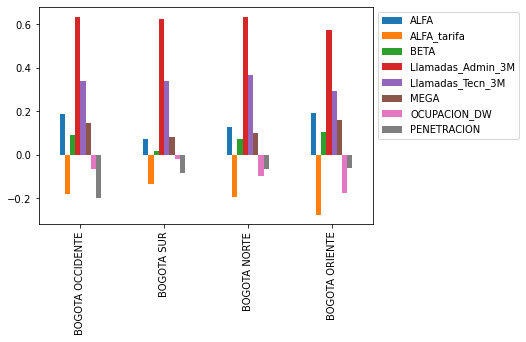

In [70]:
res_corr_total_raz_T=res_corr_total_raz.T
res_corr_total_raz_T.columns = res_corr_total_raz_T.iloc[0]
res_corr_total_raz_T = res_corr_total_raz_T.iloc[1:]
if conGraficos:    
    ax = res_corr_total_raz_T[1:].plot.bar()
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot()

In [71]:
res_corr_total_raz_T[1:]

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
BOGOTA OCCIDENTE,0.189569,-0.181761,0.089248,0.632922,0.341866,0.148347,-0.065182,-0.198992
BOGOTA SUR,0.072795,-0.135286,0.018447,0.625478,0.341991,0.08016,-0.019865,-0.085713
BOGOTA NORTE,0.127415,-0.191679,0.070774,0.635104,0.367415,0.098852,-0.096838,-0.06367
BOGOTA ORIENTE,0.190917,-0.27468,0.105541,0.576542,0.291852,0.159006,-0.176244,-0.062658


In [72]:
DataSetEntregable_totales=DataSetEntregable_totales.append(res_corr_total_raz_T[1:])
DataSetEntregable_totales

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
NACIONAL,0.165656,-0.130403,0.062054,0.618363,0.31062,0.153253,-0.085932,-0.089017
REGION COSTA,0.155981,-0.163738,0.038423,0.549379,0.212346,0.141831,-0.105801,-0.029411
REGION ORIENTE,0.189095,-0.093692,0.051029,0.651363,0.328244,0.177949,-0.050379,-0.171881
REGION CENTRO,0.156207,-0.203288,0.070358,0.616581,0.335096,0.133275,-0.099908,-0.091316
REGION NOROCCIDENTE,0.07753,-0.074485,0.04012,0.608288,0.288396,0.064971,-0.045838,-0.005858
REGION OCCIDENTE,0.21283,-0.063784,0.070613,0.637422,0.291796,0.203125,-0.084546,-0.14181
BOGOTA,0.155022,-0.204669,0.06919,0.614827,0.334086,0.132552,-0.097171,-0.088822
CALI,0.247322,-0.123283,0.050345,0.628977,0.265378,0.253106,-0.108044,-0.089332
MEDELLIN,0.101876,-0.085235,0.066919,0.622342,0.295297,0.073812,-0.076199,-0.06661
PEREIRA,0.044439,0.129521,-0.001303,0.61202,0.304067,0.049904,0.052871,0.064511


### Resultado Atemporal

In [73]:
### Guardar Archivo
##DataSetEntregable_totales.to_csv('CorrelacionesAgrupadas_14Dic.csv',sep=';')

### Temporales

In [74]:
## guardar en tabla
for reg in sectoresBog:
    data_aux=data[data['AREA']==reg]      
    #(res_corr_total_raz_T, res_corr_total_var_T)=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp=DataSetEntregable_totales_temp.append(res_corr_total_raz_T)

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(



5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Resulado Temporal

In [75]:
#DataSetEntregable_totales_temp.to_csv('CorrelacionesTemporales_14Dic.csv',sep=';')

# Regresión multilineal

* Reescalado
* Modelos

In [76]:
DataSetEntregable_totales_reg=pd.DataFrame()
DataSetEntregable_totales_temp_reg=pd.DataFrame()

In [77]:
data_reg=data_c0.copy()

In [78]:
sel_variables_causas2

['ALFA_tarifa',
 'ALFA',
 'BETA',
 'MEGA',
 'Llamadas_Admin_3M',
 'Llamadas_Tecn_3M',
 'PENETRACION',
 'OCUPACION_DW']

In [79]:
data_reg.set_index('COD_NODO',inplace=True)

In [80]:
data_reg=data_reg[sel_variables_causas2+['ind_churn','FECHA']]

In [81]:
data_reg.isnull().sum()/len(data_reg)

ALFA_tarifa          0.005656
ALFA                 0.001376
BETA                 0.000382
MEGA                 0.000994
Llamadas_Admin_3M    0.000000
Llamadas_Tecn_3M     0.000000
PENETRACION          0.000000
OCUPACION_DW         0.000267
ind_churn            0.000000
FECHA                0.000000
dtype: float64

In [82]:
data_reg=data_reg.dropna()

In [83]:
colums_reg=list(data_reg.columns)

In [84]:
colums_reg.remove('FECHA')

In [85]:
colums_reg

['ALFA_tarifa',
 'ALFA',
 'BETA',
 'MEGA',
 'Llamadas_Admin_3M',
 'Llamadas_Tecn_3M',
 'PENETRACION',
 'OCUPACION_DW',
 'ind_churn']

In [86]:
#for col in colums_reg:
#    data_reg[col]=np.log1p(data_reg[col])

In [87]:
## Escalar
#cols=data_reg.columns
scaler = MinMaxScaler()
data_reg[colums_reg]= scaler.fit_transform(data_reg[colums_reg])

In [88]:
colums_reg.remove('ind_churn')

In [89]:
colums_reg

['ALFA_tarifa',
 'ALFA',
 'BETA',
 'MEGA',
 'Llamadas_Admin_3M',
 'Llamadas_Tecn_3M',
 'PENETRACION',
 'OCUPACION_DW']

### Seleccion Variables Significativas

In [90]:
reg_nal=iter_regresion(data_reg)
reg_nal

1
      coefs        pvalues           Features    VIF
0 -0.059754  6.317238e-123        ALFA_tarifa   7.97
1  0.016306   6.052548e-02               ALFA  22.66
2  0.028483   2.214881e-05               BETA  13.20
3  0.025272   7.709404e-06               MEGA  18.86
4  0.312483   0.000000e+00  Llamadas_Admin_3M   4.90
5  0.018718   9.074422e-10   Llamadas_Tecn_3M   2.29
6 -0.028570   7.997427e-33        PENETRACION   5.81
7 -0.039726   5.172955e-51       OCUPACION_DW  11.84
      coefs   pvalues Features    VIF
1  0.016306  0.060525     ALFA  22.66
2
      coefs        pvalues           Features    VIF
0 -0.059978  4.432361e-124        ALFA_tarifa   7.30
1  0.039227   5.708840e-29               BETA   4.14
2  0.034944   2.767312e-51               MEGA   3.58
3  0.312545   0.000000e+00  Llamadas_Admin_3M   4.87
4  0.018748   8.541375e-10   Llamadas_Tecn_3M   2.29
5 -0.028514   1.056029e-32        PENETRACION   5.64
6 -0.039781   3.761109e-51       OCUPACION_DW  11.07
      coefs       p

,coefs,pvalues,Features,VIF
0,-0.059978,4.432361e-124,ALFA_tarifa,7.30
1,0.039227,5.708840e-29,BETA,4.14
2,0.034944,2.767312e-51,MEGA,3.58
3,0.312545,0.000000e+00,Llamadas_Admin_3M,4.87
4,0.018748,8.541375e-10,Llamadas_Tecn_3M,2.29
5,-0.028514,1.056029e-32,PENETRACION,5.64
6,-0.039781,3.761109e-51,OCUPACION_DW,11.07


In [91]:
colums_reg=list(reg_nal['Features'])
colums_reg

['ALFA_tarifa',
 'BETA',
 'MEGA',
 'Llamadas_Admin_3M',
 'Llamadas_Tecn_3M',
 'PENETRACION',
 'OCUPACION_DW']

### Nacional

In [92]:
# Dividir en X y X
y_train = data_reg['ind_churn']
X_train =  data_reg[colums_reg]

In [93]:
#Modelos
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ind_churn   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     2622.
Date:                Fri, 24 Dec 2021   Prob (F-statistic):               0.00
Time:                        08:49:11   Log-Likelihood:                 33635.
No. Observations:               25978   AIC:                        -6.725e+04
Df Residuals:                   25970   BIC:                        -6.719e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0981      0.003     34.329      0.000       0.093       0.104
ALFA_tarifa          -0.0600      0.003    -23.820      0.000      -0.065      -0.055
BETA                  0.0392      0.004     11.184      0.000       0.032       0.046
MEGA                  0.0349      0.002     15.098      0.000       0.030       0.039
Llamadas_Admin_3M     0.3125      0.003    108.902      0.000       0.307       0.318
Llamadas_Tecn_3M      0.0187      0.003      6.137      0.000       0.013       0.025
PENETRACION          -0.0285      0.002    -11.926      0.000      -0.033      -0.024
OCUPACION_DW         -0.0398      0.003    -15.077      0.000      -0.045      -0.035
==============================================================================
Omnibus:                     5501.148   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23327.923
Skew:                           0.989   Prob(JB):                         0.00
Kurtosis:                       7.200   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
# Cálculo VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,OCUPACION_DW,11.07
0,ALFA_tarifa,7.30
5,PENETRACION,5.64
3,Llamadas_Admin_3M,4.87
1,BETA,4.14
2,MEGA,3.58
4,Llamadas_Tecn_3M,2.29


In [95]:
df_coef_nal=lr_1.params.to_frame()
df_coef_nal.columns=['coefs']

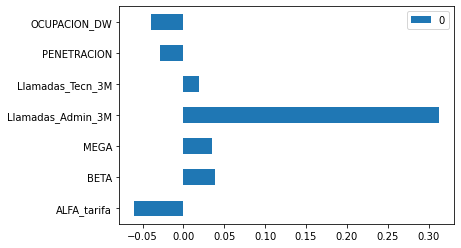

In [96]:
if conGraficos:
    lr_1.params.to_frame()[1:].plot.barh()

In [97]:
df_coef_nal

,coefs
const,0.098139
ALFA_tarifa,-0.059978
BETA,0.039227
MEGA,0.034944
Llamadas_Admin_3M,0.312545
Llamadas_Tecn_3M,0.018748
PENETRACION,-0.028514
OCUPACION_DW,-0.039781


In [98]:
df_vif_nal=vif

In [99]:
DataSetEntregable_totales_reg=df_coef_nal.copy()

In [100]:
DataSetEntregable_totales_reg=DataSetEntregable_totales_reg[1:].T
DataSetEntregable_totales_reg

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
coefs,-0.059978,0.039227,0.034944,0.312545,0.018748,-0.028514,-0.039781


In [101]:
DataSetEntregable_totales_reg['index']='NACIONAL'
DataSetEntregable_totales_reg.set_index('index',inplace=True)
DataSetEntregable_totales_reg

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
index,,,,,,,
NACIONAL,-0.059978,0.039227,0.034944,0.312545,0.018748,-0.028514,-0.039781


## Regresión en el tiempo

In [102]:
data_reg

,ALFA_tarifa,ALFA,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW,ind_churn,FECHA
COD_NODO,,,,,,,,,,
RO4,0.454811,0.271966,0.258566,0.410284,0.138030,0.251422,0.311101,0.699387,0.034763,7
KRI,0.596127,0.157346,0.295460,0.210943,0.363679,0.072900,0.250118,0.359557,0.090394,7
1601,0.482496,0.324608,0.149207,0.778936,0.192423,0.036643,0.550940,0.642779,0.064555,6
CLD,0.457082,0.166712,0.200199,0.313661,0.256048,0.129449,0.643203,0.587460,0.115913,11
SH31,0.474049,0.229690,0.329367,0.279351,0.207505,0.187177,0.126513,0.517957,0.299967,9
...,...,...,...,...,...,...,...,...,...,...
BPO1,0.246571,0.196986,0.134907,0.512256,0.790238,0.140237,0.287336,0.611069,0.311727,4
SDT,0.612386,0.305873,0.366969,0.337286,0.589228,0.533441,0.312483,0.503078,0.184119,3
CS21,0.241796,0.286965,0.162958,0.641003,0.266649,0.056420,0.494422,0.696087,0.168252,7


In [103]:
(df_coef, df_vif)=dic_reg_mes_ind(data_reg)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11


In [104]:
df_coef

,coefs,1,2,3,4,5,6,7,8,9,10,11
const,0.098139,0.076597,0.077188,0.080715,0.071094,0.100799,0.104979,0.112372,0.081396,0.115312,0.115914,0.072675
ALFA_tarifa,-0.059978,-0.048461,-0.065448,-0.067149,-0.037510,-0.052399,-0.045530,-0.050447,-0.030082,-0.075984,-0.090536,-0.062001
BETA,0.039227,0.011551,0.026339,0.067014,0.014834,0.031312,0.009117,0.016346,0.011794,0.011145,-0.020767,0.002125
MEGA,0.034944,0.049593,0.045084,0.034742,0.040958,0.039415,0.046322,0.043922,0.059197,0.039755,0.028469,0.051871
Llamadas_Admin_3M,0.312545,0.279945,0.276077,0.279546,0.323757,0.334957,0.382587,0.369474,0.404961,0.364376,0.417448,0.366657
Llamadas_Tecn_3M,0.018748,0.008295,-0.004303,-0.003023,-0.001484,0.019964,0.044073,0.007016,-0.001074,0.006659,0.024258,-0.020828
PENETRACION,-0.028514,-0.000710,-0.010801,-0.027775,-0.017794,-0.038573,-0.034697,-0.037933,-0.025802,-0.033403,-0.034254,-0.022326
OCUPACION_DW,-0.039781,-0.041732,-0.032509,-0.036987,-0.034995,-0.044297,-0.064319,-0.048897,-0.032787,-0.047057,-0.030483,-0.025715


In [105]:
df_coef_T=df_coef.T
df_coef_T.pop('const')
df_coef_T=df_coef_T[1:]
df_coef_T

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
1,-0.048461,0.011551,0.049593,0.279945,0.008295,-0.000710,-0.041732
2,-0.065448,0.026339,0.045084,0.276077,-0.004303,-0.010801,-0.032509
3,-0.067149,0.067014,0.034742,0.279546,-0.003023,-0.027775,-0.036987
4,-0.037510,0.014834,0.040958,0.323757,-0.001484,-0.017794,-0.034995
5,-0.052399,0.031312,0.039415,0.334957,0.019964,-0.038573,-0.044297
6,-0.045530,0.009117,0.046322,0.382587,0.044073,-0.034697,-0.064319
7,-0.050447,0.016346,0.043922,0.369474,0.007016,-0.037933,-0.048897
8,-0.030082,0.011794,0.059197,0.404961,-0.001074,-0.025802,-0.032787
9,-0.075984,0.011145,0.039755,0.364376,0.006659,-0.033403,-0.047057
10,-0.090536,-0.020767,0.028469,0.417448,0.024258,-0.034254,-0.030483


In [106]:
DataSetEntregable_totales_temp_reg=df_coef_T.copy()

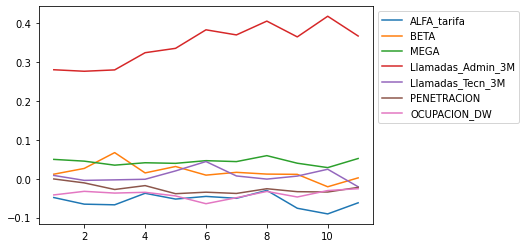

In [107]:
if conGraficos:
    ax = df_coef_T.plot.line()
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(20,10));

## Analisis Específicos

In [108]:
data_reg

,ALFA_tarifa,ALFA,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW,ind_churn,FECHA
COD_NODO,,,,,,,,,,
RO4,0.454811,0.271966,0.258566,0.410284,0.138030,0.251422,0.311101,0.699387,0.034763,7
KRI,0.596127,0.157346,0.295460,0.210943,0.363679,0.072900,0.250118,0.359557,0.090394,7
1601,0.482496,0.324608,0.149207,0.778936,0.192423,0.036643,0.550940,0.642779,0.064555,6
CLD,0.457082,0.166712,0.200199,0.313661,0.256048,0.129449,0.643203,0.587460,0.115913,11
SH31,0.474049,0.229690,0.329367,0.279351,0.207505,0.187177,0.126513,0.517957,0.299967,9
...,...,...,...,...,...,...,...,...,...,...
BPO1,0.246571,0.196986,0.134907,0.512256,0.790238,0.140237,0.287336,0.611069,0.311727,4
SDT,0.612386,0.305873,0.366969,0.337286,0.589228,0.533441,0.312483,0.503078,0.184119,3
CS21,0.241796,0.286965,0.162958,0.641003,0.266649,0.056420,0.494422,0.696087,0.168252,7


In [109]:
data_reg_nor=data_reg.copy()

In [110]:
data_reg_nor=data_reg_nor.merge(maestro_data, left_index=True, right_on=['COD_NODO'], how='left')
data_reg_nor.set_index('COD_NODO', inplace=True)

In [111]:
data_reg_nor_temp=data_reg_nor.copy()

In [112]:
data_reg_nor.pop('FECHA')

COD_NODO
RO4      7
KRI      7
1601     6
CLD     11
SH31     9
        ..
BPO1     4
SDT      3
CS21     7
LOM2     3
472D     4
Name: FECHA, Length: 27088, dtype: int64

## Regional

In [113]:
dic_resultados_reg={}

In [114]:
for reg in regionales:
    print(reg)
    dic_aux={}    
    data_aux=data_reg_nor[data_reg_nor['DIVISION']==reg] 
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    
    y_train = data_aux.pop('ind_churn')
    X_train = data_aux[colums_reg]    
    #Modelos
    X_train_lm = sm.add_constant(X_train)
    lr_1 = sm.OLS(y_train, X_train_lm).fit()    
    dic_aux['coef']=lr_1.params.to_frame()
    dic_aux['coef'].columns=['coefs']
    # Cálculo VIFs
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    dic_aux['vif']=vif
    dic_resultados[reg]=dic_aux

REGION COSTA
REGION ORIENTE
REGION CENTRO
REGION NOROCCIDENTE
REGION OCCIDENTE


In [115]:
df_coef=df_coef_nal
df_vif=df_vif_nal
for reg in regionales:
    print(reg)
    
    aux_tab_coef=dic_resultados[reg]['coef']
    aux_tab_vif=dic_resultados[reg]['vif']
    
    #aux_tab_coef.columns=[reg+'_coef']
    aux_tab_coef.columns=[reg]
    #aux_tab_vif.columns=['Features',reg+'_vif']
    aux_tab_vif.columns=['Features',reg]
    
    df_coef=df_coef.merge(aux_tab_coef,left_index=True,right_index=True, how='left')
    df_vif=df_vif.merge(aux_tab_vif,left_on='Features',right_on='Features', how='left')

REGION COSTA
REGION ORIENTE
REGION CENTRO
REGION NOROCCIDENTE
REGION OCCIDENTE


In [116]:
df_coef_T=df_coef.T
df_coef_T=df_coef_T.drop(columns=['const'])

In [117]:
df_coef_T

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
coefs,-0.059978,0.039227,0.034944,0.312545,0.018748,-0.028514,-0.039781
REGION COSTA,-0.087222,0.007745,0.036509,0.276614,-0.013258,0.001371,-0.048059
REGION ORIENTE,-0.096277,0.032231,0.020067,0.321407,0.039255,-0.043885,-0.007045
REGION CENTRO,-0.095637,0.046867,0.026044,0.297286,0.034317,-0.021572,-0.042187
REGION NOROCCIDENTE,-0.083294,0.035511,0.060044,0.326451,0.020971,0.025674,-0.034171
REGION OCCIDENTE,-0.032635,0.040580,0.060103,0.371816,0.019037,-0.005231,-0.031862


In [118]:
DataSetEntregable_totales_reg=DataSetEntregable_totales_reg.append(df_coef_T[1:])
DataSetEntregable_totales_reg

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
NACIONAL,-0.059978,0.039227,0.034944,0.312545,0.018748,-0.028514,-0.039781
REGION COSTA,-0.087222,0.007745,0.036509,0.276614,-0.013258,0.001371,-0.048059
REGION ORIENTE,-0.096277,0.032231,0.020067,0.321407,0.039255,-0.043885,-0.007045
REGION CENTRO,-0.095637,0.046867,0.026044,0.297286,0.034317,-0.021572,-0.042187
REGION NOROCCIDENTE,-0.083294,0.035511,0.060044,0.326451,0.020971,0.025674,-0.034171
REGION OCCIDENTE,-0.032635,0.040580,0.060103,0.371816,0.019037,-0.005231,-0.031862


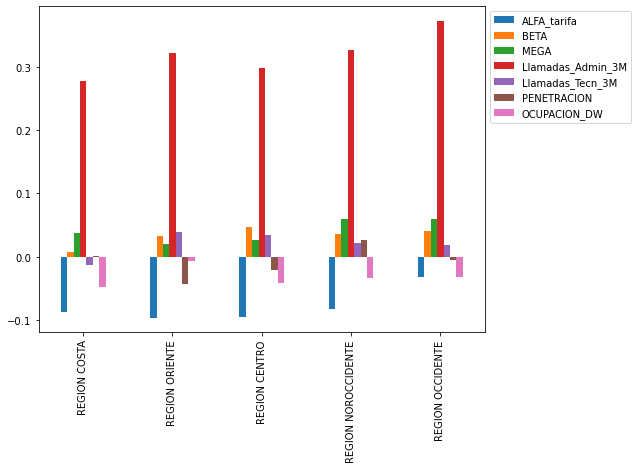

In [119]:
if conGraficos:
    ax = df_coef_T[1:].plot.bar(figsize=(8, 6))
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(20,10));

####  Analisis temporal

In [120]:
for reg in regionales:
    data_aux=data_reg_nor_temp[data_reg_nor_temp['DIVISION']==reg] 
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    (df_coef, df_vif)=dic_reg_mes_ind(data_aux)
    df_coef_T=df_coef.T
    df_coef_T.pop('const')
    df_coef_T=df_coef_T[1:]
    df_coef_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp_reg=DataSetEntregable_totales_temp_reg.append(df_coef_T)    

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


In [121]:
DataSetEntregable_totales_temp_reg['CATEGORIA']=DataSetEntregable_totales_temp_reg['CATEGORIA'].fillna('NACIONAL')

In [122]:
DataSetEntregable_totales_temp_reg

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW,CATEGORIA
1,-0.048461,0.011551,0.049593,0.279945,0.008295,-0.000710,-0.041732,NACIONAL
2,-0.065448,0.026339,0.045084,0.276077,-0.004303,-0.010801,-0.032509,NACIONAL
3,-0.067149,0.067014,0.034742,0.279546,-0.003023,-0.027775,-0.036987,NACIONAL
4,-0.037510,0.014834,0.040958,0.323757,-0.001484,-0.017794,-0.034995,NACIONAL
5,-0.052399,0.031312,0.039415,0.334957,0.019964,-0.038573,-0.044297,NACIONAL
...,...,...,...,...,...,...,...,...
7,0.024099,0.014764,0.081171,0.406117,0.040137,-0.033302,-0.054659,REGION OCCIDENTE
8,-0.010819,-0.000146,0.100231,0.488650,-0.017617,-0.013737,-0.036146,REGION OCCIDENTE
9,-0.011712,-0.002384,0.055901,0.373664,0.047017,-0.021657,-0.080286,REGION OCCIDENTE
10,-0.029736,-0.027536,0.033276,0.441251,0.003646,-0.014446,-0.036082,REGION OCCIDENTE


## Ciudades

In [123]:
dic_resultados_ciudad_reg={}
for reg in ciudades:
    print(reg)
    dic_aux={}    
    data_aux=data_reg_nor[data_reg_nor['CIUDAD']==reg] 
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    
    if len(data_aux)>0:
        y_train = data_aux.pop('ind_churn')
        X_train = data_aux[colums_reg]   

        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()    
        dic_aux['coef']=lr_1.params.to_frame()
        dic_aux['coef'].columns=['coefs']
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        dic_aux['vif']=vif
        dic_resultados_ciudad_reg[reg]=dic_aux

BOGOTA
CALI
MEDELLIN
PEREIRA
IBAGUE
BUCARAMANGA


In [124]:
df_coef=df_coef_nal
df_vif=df_vif_nal
for reg in dic_resultados_ciudad_reg:
    print(reg)    
    aux_tab_coef=dic_resultados_ciudad_reg[reg]['coef']
    aux_tab_vif=dic_resultados_ciudad_reg[reg]['vif']
    
    #aux_tab_coef.columns=[reg+'_coef']
    aux_tab_coef.columns=[reg]
    #aux_tab_vif.columns=['Features',reg+'_vif']
    aux_tab_vif.columns=['Features',reg]
    
    df_coef=df_coef.merge(aux_tab_coef,left_index=True,right_index=True, how='left')
    df_vif=df_vif.merge(aux_tab_vif,left_on='Features',right_on='Features', how='left')

BOGOTA
CALI
MEDELLIN
PEREIRA
IBAGUE
BUCARAMANGA


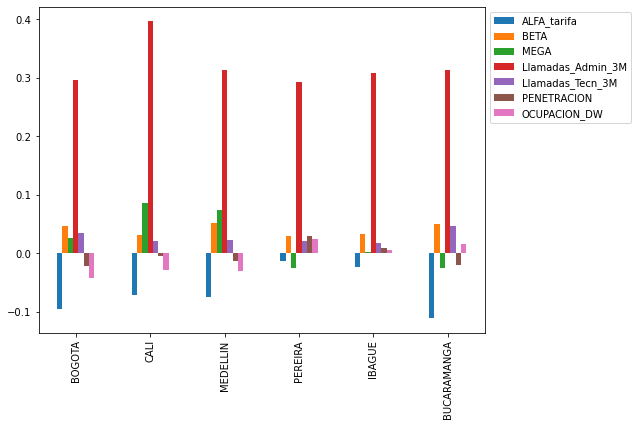

In [125]:
df_coef_T=df_coef.T
df_coef_T=df_coef_T.drop(columns=['const'])
if conGraficos:
    ax = df_coef_T[1:].plot.bar(figsize=(8, 6))
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(20,10));

In [126]:
df_coef_T[1:]

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
BOGOTA,-0.095756,0.046835,0.026466,0.296546,0.034834,-0.021583,-0.042301
CALI,-0.071735,0.031588,0.086474,0.395691,0.021245,-0.003893,-0.028893
MEDELLIN,-0.075200,0.051431,0.073994,0.313151,0.023474,-0.013071,-0.029429
PEREIRA,-0.013848,0.029702,-0.024711,0.292144,0.020574,0.028801,0.025046
IBAGUE,-0.023144,0.033516,0.002469,0.307405,0.018318,0.009223,0.006010
BUCARAMANGA,-0.110428,0.050730,-0.025739,0.312513,0.045816,-0.019515,0.015397


In [127]:
DataSetEntregable_totales_reg=DataSetEntregable_totales_reg.append(df_coef_T[1:])
DataSetEntregable_totales_reg

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
NACIONAL,-0.059978,0.039227,0.034944,0.312545,0.018748,-0.028514,-0.039781
REGION COSTA,-0.087222,0.007745,0.036509,0.276614,-0.013258,0.001371,-0.048059
REGION ORIENTE,-0.096277,0.032231,0.020067,0.321407,0.039255,-0.043885,-0.007045
REGION CENTRO,-0.095637,0.046867,0.026044,0.297286,0.034317,-0.021572,-0.042187
REGION NOROCCIDENTE,-0.083294,0.035511,0.060044,0.326451,0.020971,0.025674,-0.034171
REGION OCCIDENTE,-0.032635,0.040580,0.060103,0.371816,0.019037,-0.005231,-0.031862
BOGOTA,-0.095756,0.046835,0.026466,0.296546,0.034834,-0.021583,-0.042301
CALI,-0.071735,0.031588,0.086474,0.395691,0.021245,-0.003893,-0.028893
MEDELLIN,-0.075200,0.051431,0.073994,0.313151,0.023474,-0.013071,-0.029429
PEREIRA,-0.013848,0.029702,-0.024711,0.292144,0.020574,0.028801,0.025046


#### Analisis temporal

In [128]:
for reg in ciudades:
    data_aux=data_reg_nor_temp[data_reg_nor_temp['CIUDAD']==reg]
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    (df_coef, df_vif)=dic_reg_mes_ind(data_aux)
    df_coef_T=df_coef.T
    df_coef_T.pop('const')
    df_coef_T=df_coef_T[1:]
    df_coef_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp_reg=DataSetEntregable_totales_temp_reg.append(df_coef_T)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

8
9
10
11
1
2
3
4
5
6
7
8
9
10
11

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a


1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


In [129]:
DataSetEntregable_totales_temp_reg

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW,CATEGORIA
1,-0.048461,0.011551,0.049593,0.279945,0.008295,-0.000710,-0.041732,NACIONAL
2,-0.065448,0.026339,0.045084,0.276077,-0.004303,-0.010801,-0.032509,NACIONAL
3,-0.067149,0.067014,0.034742,0.279546,-0.003023,-0.027775,-0.036987,NACIONAL
4,-0.037510,0.014834,0.040958,0.323757,-0.001484,-0.017794,-0.034995,NACIONAL
5,-0.052399,0.031312,0.039415,0.334957,0.019964,-0.038573,-0.044297,NACIONAL
...,...,...,...,...,...,...,...,...
7,-0.136964,0.038942,0.016983,0.352419,0.111859,0.059754,0.061892,BUCARAMANGA
8,-0.064951,0.092968,0.057798,0.449946,0.145969,0.035188,-0.080582,BUCARAMANGA
9,-0.306947,0.077934,-0.100436,0.369382,-0.119401,0.028251,-0.005105,BUCARAMANGA
10,-0.104493,0.024757,-0.032268,0.336185,0.103097,0.102520,-0.056586,BUCARAMANGA


## Bogota

In [130]:
dic_resultados_Bogota={}
for reg in sectoresBog:
    print(reg)
    dic_aux={}    
    data_aux=data_reg_nor[data_reg_nor['AREA']==reg] 
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    
    if len(data_aux)>0:
        y_train = data_aux.pop('ind_churn')
        X_train = data_aux[colums_reg]   

        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()    
        dic_aux['coef']=lr_1.params.to_frame()
        dic_aux['coef'].columns=['coefs']
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        dic_aux['vif']=vif
        dic_resultados_Bogota[reg]=dic_aux

BOGOTA OCCIDENTE
BOGOTA SUR
BOGOTA NORTE
BOGOTA ORIENTE


In [131]:
df_coef=df_coef_nal
df_vif=df_vif_nal
for reg in dic_resultados_Bogota:
    print(reg)    
    aux_tab_coef=dic_resultados_Bogota[reg]['coef']
    aux_tab_vif=dic_resultados_Bogota[reg]['vif']
    
    #aux_tab_coef.columns=[reg+'_coef']
    aux_tab_coef.columns=[reg]
    #aux_tab_vif.columns=['Features',reg+'_vif']
    aux_tab_vif.columns=['Features',reg]
    
    df_coef=df_coef.merge(aux_tab_coef,left_index=True,right_index=True, how='left')
    df_vif=df_vif.merge(aux_tab_vif,left_on='Features',right_on='Features', how='left')

BOGOTA OCCIDENTE
BOGOTA SUR
BOGOTA NORTE
BOGOTA ORIENTE


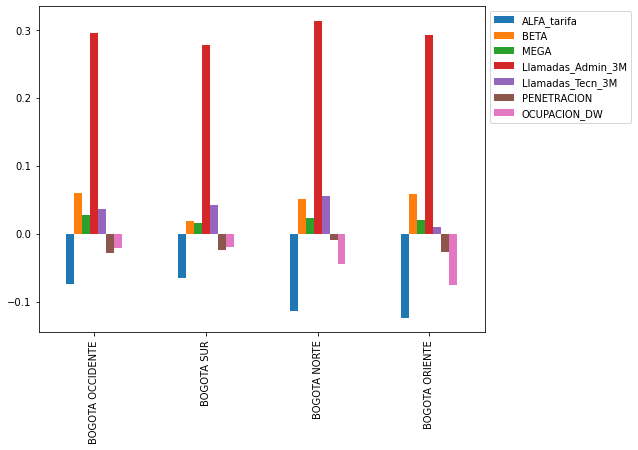

In [132]:
df_coef_T=df_coef.T
df_coef_T=df_coef_T.drop(columns=['const'])
if conGraficos:
    ax = df_coef_T[1:].plot.bar(figsize=(8, 6))
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(20,10));

In [133]:
DataSetEntregable_totales_reg=DataSetEntregable_totales_reg.append(df_coef_T[1:])
DataSetEntregable_totales_reg

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
NACIONAL,-0.059978,0.039227,0.034944,0.312545,0.018748,-0.028514,-0.039781
REGION COSTA,-0.087222,0.007745,0.036509,0.276614,-0.013258,0.001371,-0.048059
REGION ORIENTE,-0.096277,0.032231,0.020067,0.321407,0.039255,-0.043885,-0.007045
REGION CENTRO,-0.095637,0.046867,0.026044,0.297286,0.034317,-0.021572,-0.042187
REGION NOROCCIDENTE,-0.083294,0.035511,0.060044,0.326451,0.020971,0.025674,-0.034171
REGION OCCIDENTE,-0.032635,0.040580,0.060103,0.371816,0.019037,-0.005231,-0.031862
BOGOTA,-0.095756,0.046835,0.026466,0.296546,0.034834,-0.021583,-0.042301
CALI,-0.071735,0.031588,0.086474,0.395691,0.021245,-0.003893,-0.028893
MEDELLIN,-0.075200,0.051431,0.073994,0.313151,0.023474,-0.013071,-0.029429
PEREIRA,-0.013848,0.029702,-0.024711,0.292144,0.020574,0.028801,0.025046


### Analisis Temporal

In [134]:
for reg in sectoresBog:
    data_aux=data_reg_nor_temp[data_reg_nor_temp['AREA']==reg]
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    (df_coef, df_vif)=dic_reg_mes_ind(data_aux)
    df_coef_T=df_coef.T
    df_coef_T.pop('const')
    df_coef_T=df_coef_T[1:]
    df_coef_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp_reg=DataSetEntregable_totales_temp_reg.append(df_coef_T)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a


9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [135]:
DataSetEntregable_totales_temp_reg

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW,CATEGORIA
1,-0.048461,0.011551,0.049593,0.279945,0.008295,-0.000710,-0.041732,NACIONAL
2,-0.065448,0.026339,0.045084,0.276077,-0.004303,-0.010801,-0.032509,NACIONAL
3,-0.067149,0.067014,0.034742,0.279546,-0.003023,-0.027775,-0.036987,NACIONAL
4,-0.037510,0.014834,0.040958,0.323757,-0.001484,-0.017794,-0.034995,NACIONAL
5,-0.052399,0.031312,0.039415,0.334957,0.019964,-0.038573,-0.044297,NACIONAL
...,...,...,...,...,...,...,...,...
7,-0.142602,0.005724,0.041967,0.339060,-0.027101,-0.028433,-0.141189,BOGOTA ORIENTE
8,-0.088460,-0.005186,0.034088,0.429935,-0.009464,-0.030006,-0.091207,BOGOTA ORIENTE
9,-0.191657,0.043268,0.046815,0.393223,-0.006828,-0.034938,-0.040888,BOGOTA ORIENTE
10,-0.112375,0.000368,0.039177,0.413977,-0.016985,-0.054597,-0.066876,BOGOTA ORIENTE


In [136]:
### Guardar Archivo

In [137]:
#DataSetEntregable_totales_reg.to_csv('RegresionesAgrupadas_14Dic.csv',sep=';')

In [138]:
#DataSetEntregable_totales_temp_reg.to_csv('RegresionesTemporales_14Dic.csv',sep=';')

## Resultados

In [139]:
DataSetEntregable_totales
DataSetEntregable_totales_temp
DataSetEntregable_totales_reg
DataSetEntregable_totales_temp_reg

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW,CATEGORIA
1,-0.048461,0.011551,0.049593,0.279945,0.008295,-0.000710,-0.041732,NACIONAL
2,-0.065448,0.026339,0.045084,0.276077,-0.004303,-0.010801,-0.032509,NACIONAL
3,-0.067149,0.067014,0.034742,0.279546,-0.003023,-0.027775,-0.036987,NACIONAL
4,-0.037510,0.014834,0.040958,0.323757,-0.001484,-0.017794,-0.034995,NACIONAL
5,-0.052399,0.031312,0.039415,0.334957,0.019964,-0.038573,-0.044297,NACIONAL
...,...,...,...,...,...,...,...,...
7,-0.142602,0.005724,0.041967,0.339060,-0.027101,-0.028433,-0.141189,BOGOTA ORIENTE
8,-0.088460,-0.005186,0.034088,0.429935,-0.009464,-0.030006,-0.091207,BOGOTA ORIENTE
9,-0.191657,0.043268,0.046815,0.393223,-0.006828,-0.034938,-0.040888,BOGOTA ORIENTE
10,-0.112375,0.000368,0.039177,0.413977,-0.016985,-0.054597,-0.066876,BOGOTA ORIENTE
